#Part 1: Text Representation

In [2]:
# 1- Importing libraries
import pandas as pd
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
stemmer = PorterStemmer()
import string


In [3]:
df=pd.read_csv('/content/Spam_SMS.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Spam_SMS.csv'

In [ ]:
df.sample(5)

,Class,Message
4917,ham,"Just dropped em off, omw back now"
3821,ham,"I got arrested for possession at, I shit you n..."
3125,ham,My uncles in Atlanta. Wish you guys a great se...
400,ham,Hmmm...k...but i want to change the field quic...
2409,ham,Dear where you will be when i reach there


In [ ]:
df.shape

(5574, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**1- Data cleaning**


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder( )

In [ ]:
df['Class']=encoder.fit_transform(df['Class'])


In [ ]:
df.head()


,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Missing values
df.isnull().sum()

,0
Class,0
Message,0


In [ ]:
#check for Duplicate values
df.duplicated().sum()

np.int64(415)

In [ ]:
#Remove Duplicate values
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5159, 2)

2- EDA


In [ ]:
df['Class'].value_counts()

,count
Class,
0,4518
1,641


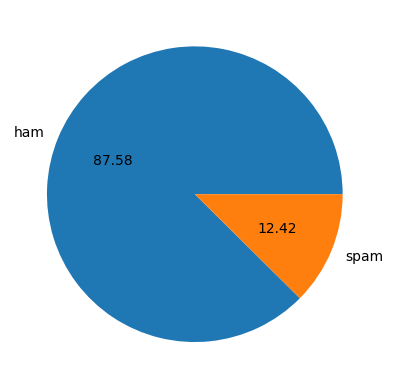

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
df['Message']

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5569,This is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home?
5571,"Pity, * was in mood for that. So...any other s..."
5572,The guy did some bitching but I acted like i'd...


In [ ]:
df['num_characters']= df['Message'].apply(len)

In [ ]:
# Review length is a new column in the data frame df calculating the length of each review.
print(df['Message'].describe())

count                           5159
unique                          5159
top       Rofl. Its true to its name
freq                               1
Name: Message, dtype: object


In [ ]:
df.head()

,Class,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#Num of words:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
#Num of sentences:
df['num_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,Class,Message,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Review length is a new column in the data frame df calculating the length of each review.

print(df[['num_characters','num_words','num_sent']].describe())


       num_characters    num_words     num_sent
count     5159.000000  5159.000000  5159.000000
mean        79.130064    18.596821     1.970731
std         58.289063    13.406675     1.455997
min          2.000000     1.000000     1.000000
25%         36.000000     9.000000     1.000000
50%         61.000000    15.000000     1.000000
75%        118.000000    26.000000     2.000000
max        910.000000   220.000000    38.000000


In [ ]:
#ham message :
df[df['Class']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4518.000000,4518.000000,4518.000000
mean,70.861000,17.302125,1.827579
std,56.584513,13.592056,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam message :
df[df['Class']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,641.000000,641.000000,641.000000
mean,137.413417,27.722309,2.979719
std,29.998996,7.032577,1.483627
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

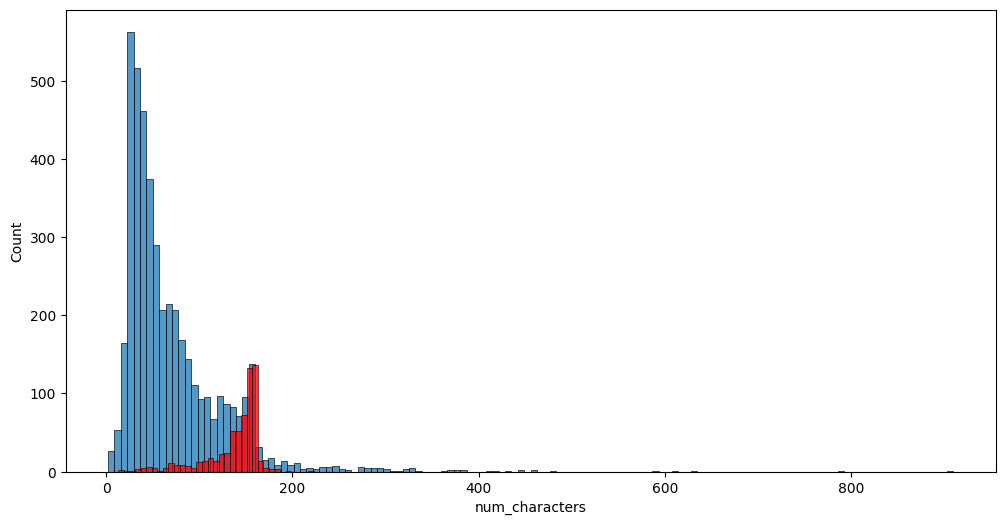

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class']==0]['num_characters'])
sns.histplot(df[df['Class']==1]['num_characters'],color='red')

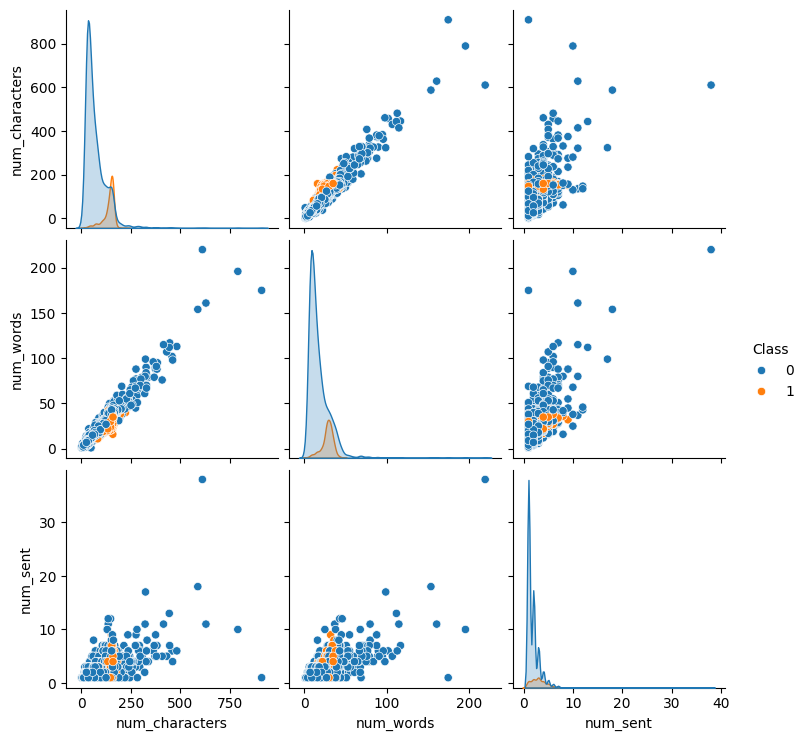

In [ ]:
sns.pairplot(df,hue='Class')

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving') #test

'love'

3- Data preprocessing


In [ ]:
def transform_text(text):
    text=text.lower()
    # word_tokenize
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
      if i.isalnum():
            y.append(i)

  # stopwords.words
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)

  # PorterStemmer
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return ' '.join (y)


In [ ]:
df['Message'][100]

"Please don't text me anymore. I have nothing else to say."

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
df['transformed_text']=df['Message'].apply(transform_text)
df.head()

,Class,Message,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


##Bag of Words (Bow)

a. Use the CountVectorizer from scikit-learn to create a Bag-of-Words (BoW) representation of the dataset.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer()


b. Use the TfidfVectorizer from scikit-learn to create a TF-IDF representation of the dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=3000)

c. Compare the BoW and TF-IDF matrices (e.g., shape, sparsity)

In [ ]:
u=bow_vectorizer.fit_transform(df['transformed_text']).toarray()
u.shape

(5159, 6789)

In [ ]:
t=tfidf_vectorizer.fit_transform(df['transformed_text']).toarray()
t.shape

(5159, 3000)

In [ ]:
h=df['Class'].values
h

array([0, 0, 1, ..., 0, 0, 0])

#2. Data Visualization

a. Plot the top 10 most frequent words in spam vs. ham messages



In [ ]:
df[df['Class']==1] ['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [ ]:
spam_corpus = []
for msg in df[df['Class']==1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 186,
         'entri': 21,
         '2': 154,
         'wkli': 9,
         'comp': 8,
         'win': 45,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 8,
         'std': 6,
         'txt': 139,
         'rate': 26,
         'c': 43,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 19,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 39,
         'select': 26,
         'receivea': 1,
         'prize': 79,
         'reward': 7,
         'claim': 97,
         'cal

In [ ]:
Counter(spam_corpus).most_common(10)

[('call', 313),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 118),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 102)]

b. Create a word cloud for spam and ham messages separately

In [ ]:
from wordcloud import WordCloud
wc = WordCloud (width=500,height=500,min_font_size=15,background_color='black')

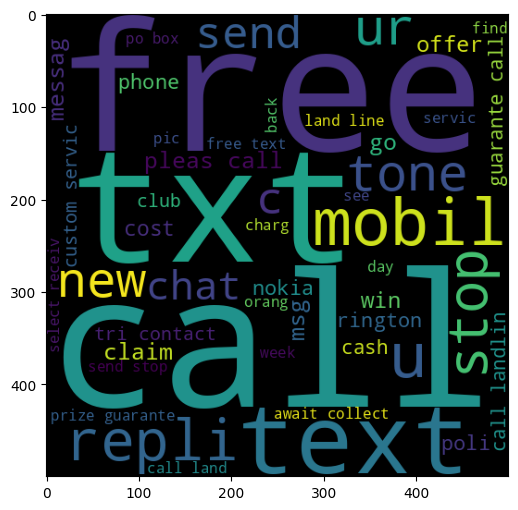

In [ ]:
spam_wc=wc.generate(df[df['Class']==1] ['transformed_text'] .str.cat(sep=""))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

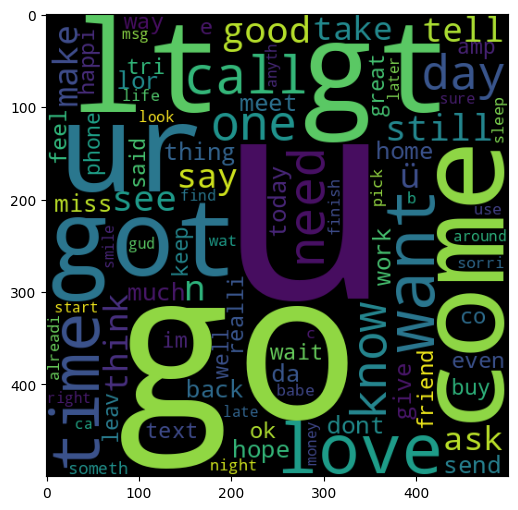

In [ ]:
ham_wc=wc.generate(df[df['Class']==0] ['transformed_text'] .str.cat(sep=""))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


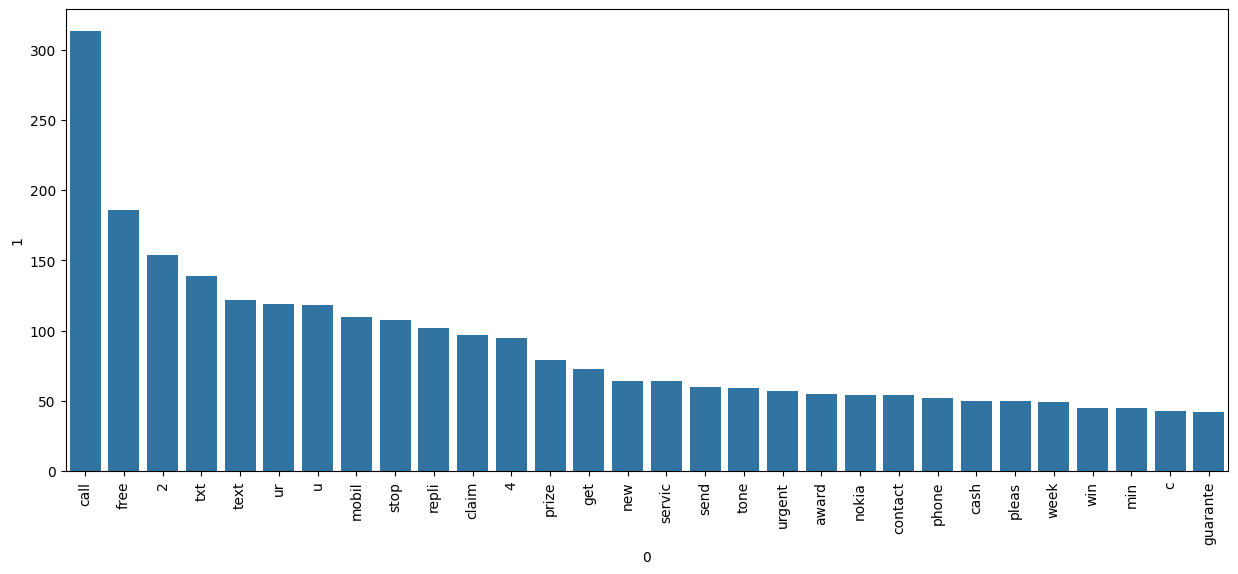

In [ ]:
X = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize = (15,6))
sns.barplot(x = X[0],y =  X[1])
plt.xticks(rotation = 'vertical')
plt.show()

#Part 2: Spam Classification using ML

In [ ]:
X = df['Message']
y = df['Class']

In [ ]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Vectorization
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
nb=MultinomialNB()
nb.fit(X_train_bow,y_train)

MultinomialNB()

#Part 3: Model Evaluation and Comparison

In [ ]:
#Naïve Bayes with BoW
y_pred=nb.predict(X_test_bow)
print("Naïve Bayes with BoW:")
print('classification_report\n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print( 'recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

Naïve Bayes with BoW:
classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1354
           1       0.96      0.93      0.94       194

    accuracy                           0.99      1548
   macro avg       0.98      0.96      0.97      1548
weighted avg       0.99      0.99      0.99      1548

confusion_matrix 
 [[1347    7]
 [  14  180]]
accuracy_score 0.9864341085271318
precision_score 0.9625668449197861
recall_score 0.9278350515463918
f1_score 0.9448818897637795


In [ ]:
#Naïve Bayes with TF-IDF
y_pred=nb.predict(X_test_tfidf)
print("Naïve Bayes with TF-IDF:")
print('classification_report\n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print( 'recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

Naïve Bayes with TF-IDF:
classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.99      0.88      0.93       194

    accuracy                           0.98      1548
   macro avg       0.99      0.94      0.96      1548
weighted avg       0.98      0.98      0.98      1548

confusion_matrix 
 [[1352    2]
 [  24  170]]
accuracy_score 0.9832041343669251
precision_score 0.9883720930232558
0.8762886597938144
0.9289617486338798


In [ ]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

ir=LogisticRegression().fit(X_train_bow,y_train)
y_pred=ir.predict(X_test_bow)

In [ ]:
#Logistic Regression with BoW
print("Logistic Regression with BoW:")
print('classification_report\n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print( 'recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))


Logistic Regression with BoW:
classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.99      0.84      0.91       194

    accuracy                           0.98      1548
   macro avg       0.98      0.92      0.95      1548
weighted avg       0.98      0.98      0.98      1548

confusion_matrix 
 [[1352    2]
 [  32  162]]
accuracy_score 0.9780361757105943
precision_score 0.9878048780487805
recall_score 0.8350515463917526
f1_score 0.9050279329608939


In [ ]:
# Logistic Regression with TF-IDF:
ir=LogisticRegression().fit(X_train_tfidf,y_train)
y_pred=ir.predict(X_test_tfidf)
print("Logistic Regression with TF-IDF:")
print('classification_report\n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print( 'recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))


Logistic Regression with TF-IDF:
classification_report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.99      0.71      0.83       194

    accuracy                           0.96      1548
   macro avg       0.97      0.85      0.90      1548
weighted avg       0.96      0.96      0.96      1548

confusion_matrix 
 [[1352    2]
 [  56  138]]
accuracy_score 0.962532299741602
precision_score 0.9857142857142858
recall_score 0.711340206185567
f1_score 0.8263473053892215


In [ ]:
#import Support Vector Machine (SVM)
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_bow,y_train)
y_pred=svm.predict(X_test_bow )


In [ ]:
#Support Vector Machine (SVM) on BoW
print( 'Support Vector Machine (SVM) on BoW ')
print('classification_report\n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print( 'recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))


Support Vector Machine (SVM) on BoW 
classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.99      0.82      0.90       194

    accuracy                           0.98      1548
   macro avg       0.98      0.91      0.94      1548
weighted avg       0.98      0.98      0.98      1548

confusion_matrix 
 [[1353    1]
 [  34  160]]
accuracy_score 0.977390180878553
precision_score 0.9937888198757764
recall_score 0.8247422680412371
f1_score 0.9014084507042254


In [ ]:
##Support Vector Machine (SVM) on TF-IDF
svm=SVC()
svm.fit(X_train_tfidf,y_train)
y_pred=svm.predict(X_test_tfidf )
print( 'Support Vector Machine (SVM) on TF-IDF ')
print('classification_report\n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print( 'recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))


Support Vector Machine (SVM) on TF-IDF 
classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.99      0.85      0.92       194

    accuracy                           0.98      1548
   macro avg       0.99      0.92      0.95      1548
weighted avg       0.98      0.98      0.98      1548

confusion_matrix 
 [[1353    1]
 [  29  165]]
accuracy_score 0.9806201550387597
precision_score 0.9939759036144579
recall_score 0.8505154639175257
f1_score 0.9166666666666666
